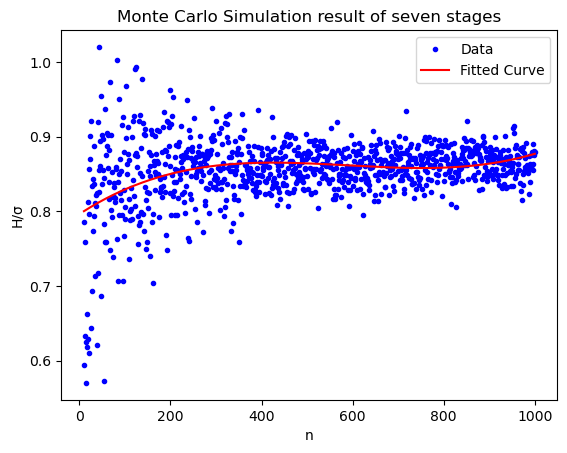

In [2]:
import numpy as np
import statistics
from random import uniform
import matplotlib.pyplot as plt

a = [2, 20, 10, 6, 11, 12, 27]
c = [10, 30, 19, 13, 16, 19, 36]
midpoints = [(a[i] + c[i]) / 2 for i in range(len(a))]

w_ = []

for n in range(10, 1001):
    d_10 = []
    for _ in range(n):
        d = []
        p = uniform(0.9, 1.1) 
        for i in range(7):
            midpoint = p* midpoints[i]
            duration = midpoint * (c[i] - a[i])
            d.append(duration)
        d_10.append(sum(d))
    std_dev = statistics.stdev(d_10)
    median = statistics.median(d_10)
    mad = statistics.median([abs(x - median) for x in d_10])
    w_.append(mad / std_dev)
    #print(f"n={n}: σ={std_dev}, MAD={mad}")

x = np.arange(10, 1001)
y = np.array(w_)
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

plt.plot(x, y, 'b.', label='Data')
plt.plot(x, polynomial(x), 'r-', label='Fitted Curve')
plt.xlabel('n')
plt.ylabel('H/σ')
plt.title('Monte Carlo Simulation result of seven stages')
plt.legend()
plt.show()


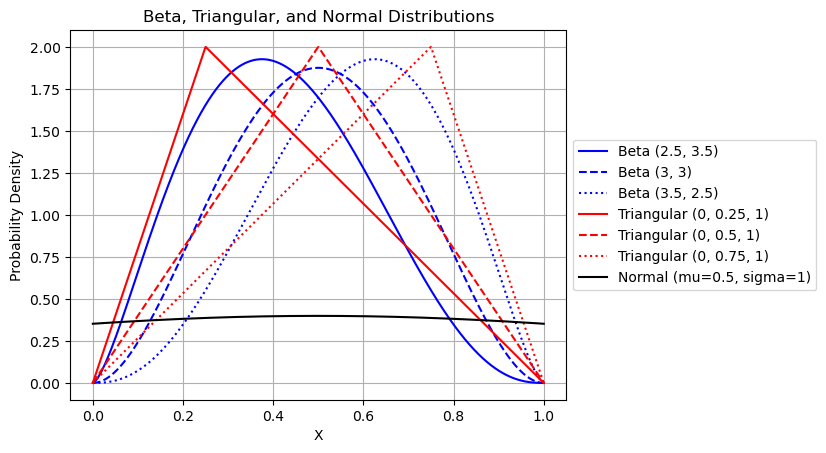

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define x range
x = np.linspace(0, 1, 1000)

# Beta distributions
beta_params = [(2.5, 3.5), (3, 3), (3.5, 2.5)]
beta_colors = ['blue', 'blue', 'blue']
beta_linestyles = ['-', '--', ':']

for params, color, linestyle in zip(beta_params, beta_colors, beta_linestyles):
    alpha, beta = params
    y = stats.beta.pdf(x, alpha, beta)
    plt.plot(x, y, label=f'Beta ({alpha}, {beta})', color=color, linestyle=linestyle)

# Triangular distributions
triangular_params = [(0, 0.25, 1), (0, 0.5, 1), (0, 0.75, 1)]
triangular_colors = ['red', 'red', 'red']
triangular_linestyles = ['-', '--', ':']

for params, color, linestyle in zip(triangular_params, triangular_colors, triangular_linestyles):
    min_val, mode, max_val = params
    y = stats.triang.pdf(x, loc=min_val, c=(mode-min_val)/(max_val-min_val), scale=max_val-min_val)
    plt.plot(x, y, label=f'Triangular (0, {mode}, 1)', color=color, linestyle=linestyle)

# Normal distribution
mu, sigma = 0.5, 1
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, label='Normal (mu=0.5, sigma=1)', color='black')

plt.title('Beta, Triangular, and Normal Distributions')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

In [ ]:
# overleaf
import numpy as np
import pandas as pd
import scipy.special as sc
import math

table_data = []

def calculate_measures(a, b, c):
    x_alpha = 1 + 4*(b-a)/(c-a)
    x_beta  = 1 + 4*(c-b)/(c-a)
    x_mean = (a+4*b + c)/6
    x_sigma = (c-a)/6
    numerator = (c - a) * 2 * (x_alpha ** x_alpha) * (x_beta ** x_beta)
    denominator = (x_alpha + x_beta) ** (x_alpha + x_beta + 1) * sc.beta(x_alpha, x_beta)
    x_mad = numerator / denominator
    ratio=x_mad/x_sigma*100
    
    # Calculate mu and sigma for triangular distribution
    mu_triangular = (a + b + c) / 3
    sigma_triangular = math.sqrt((a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18)
    
    return (round(a, 2), round(b, 2), round(c, 2), round(x_alpha, 2), round(x_beta, 2), round(x_mean, 2), 
            round(x_sigma, 2), round(x_mad, 2), round(ratio, 2), round(mu_triangular, 2), round(sigma_triangular, 2))

data = []
a, c = 0, 100
for b in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]:
    data.append(list(calculate_measures(a, b, c)))

df = pd.DataFrame(data, columns=['min', 'mode', 'max', 'alpha', 'beta', 'mu', 'sigma', 'mad', 'mad/sigma (%)', 'mu_triangular', 'sigma_triangular'])
print(df)


In [4]:
import numpy as np
import pandas as pd
import scipy.special as sc

lambda_values = [4]

table_data = [
    {"Description": "Excavation of pile cap", "Pessimistic": 2, "Moderate": 5, "Optimistic": 10},
    {"Description": "Foundation Work Erection", "Pessimistic": 20, "Moderate": 23, "Optimistic": 30},
    {"Description": "Cutting Pile’s Head", "Pessimistic": 10, "Moderate": 14, "Optimistic": 19},
    {"Description": "Work Floor 10 cm", "Pessimistic": 6, "Moderate": 8, "Optimistic": 13},
    {"Description": "Formwork Pile Cap", "Pessimistic": 11, "Moderate": 13, "Optimistic": 16},
    {"Description": "Steel Assembly Pile Cap", "Pessimistic": 12, "Moderate": 16, "Optimistic": 19},
    {"Description": "Fc 30 MPa Concrete Casting", "Pessimistic": 27, "Moderate": 31, "Optimistic": 36}
]

def calculate_measures(a, b, c, l):
    x_alpha = 1 + l * (b - a) / (c - a)
    x_beta = 1 + l * (c - b) / (c - a)
    x_mean = (a + l * b + c) / 6
    Pert_sigma = (c-a)/6
    numerator = (c - a) * 2 * (x_alpha ** x_alpha) * (x_beta ** x_beta)
    denominator = (x_alpha + x_beta) ** (x_alpha + x_beta + 1) * sc.beta(x_alpha, x_beta)
    Tri_sigma = np.sqrt(a**2 + b**2 + c**2 - a*b - a*c - b*c / 18)
    Pert_mad = numerator / denominator
    Pert_ratio = Pert_mad / Pert_sigma*100

    if a + c < 2 * b:
        Tri_mad = (2 * (c + b - 2 * a) ** 3) / (81 * (a - c) * (a - b))
    else:
        Tri_mad = (2 * (a + b - 2 * c) ** 3) / (81 * (a - c) * (c - b))
        
    Tri_ratio = Tri_mad / Tri_sigma*100
    return (a, b, c, x_alpha, x_beta, x_mean, Pert_sigma, Pert_mad, Pert_ratio, Tri_sigma, Tri_mad, Tri_ratio)



table_output = []

for item in table_data:
    a = item["Pessimistic"]
    b = item["Moderate"]
    c = item["Optimistic"]
    for l in lambda_values:
        measures = calculate_measures(a, b, c, l)
        rounded_measures = [round(val, 2) for val in measures]
        table_output.append([item["Description"]] + rounded_measures)

column_names = ["Description", "Min", "Mode", "Max", "Alpha", "Beta", "Mu", "Sigma_Pert", "Mad_Pert","Mad/Sigma(%)Pert","Sigma_Triangular","Mad_Triangular","Mad/Sigma(%)Triangular"]
df = pd.DataFrame(table_output, columns=column_names)
print(df)


                  Description  Min  Mode  Max  Alpha  Beta     Mu  Sigma_Pert  \
0      Excavation of pile cap    2     5   10   2.50  3.50   5.33        1.33   
1    Foundation Work Erection   20    23   30   2.20  3.80  23.67        1.67   
2         Cutting Pile’s Head   10    14   19   2.78  3.22  14.17        1.50   
3            Work Floor 10 cm    6     8   13   2.14  3.86   8.50        1.17   
4           Formwork Pile Cap   11    13   16   2.60  3.40  13.17        0.83   
5     Steel Assembly Pile Cap   12    16   19   3.29  2.71  15.83        1.17   
6  Fc 30 MPa Concrete Casting   27    31   36   2.78  3.22  31.17        1.50   

   Mad_Pert  Mad/Sigma(%)Pert  Sigma_Triangular  Mad_Triangular  \
0      1.23             92.30              9.81            1.36   
1      1.50             89.98             27.03            1.73   
2      1.40             93.46             17.67            1.51   
3      1.04             89.41             11.71            1.22   
4      0.77     